In [87]:
import pandas as pd

df = pd.read_csv('tweetsFeatures.csv',sep=',')
df.head()

,Unnamed: 0,CountyOutcome,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Gini.Coefficient,Management.professional.and.related.occupations,...,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Violent.crime,tSentiment,cSentiment
0,0,1,0.831954,0.004646,0.083650,0.005855,0.108392,0.026248,0.463470,0.552174,...,0.319198,0.249047,0.229167,0.474138,0.310559,0.058300,0.585082,0.271977,-0.059051,-0.07589
1,1,1,0.398656,0.001742,0.425312,0.067916,0.256119,0.022131,0.388128,0.473913,...,0.319198,0.426938,0.378701,0.531609,0.329193,0.116776,0.645688,0.129210,-0.059051,-0.07589
2,2,1,0.095657,0.095819,0.243889,0.970726,0.090909,0.112198,0.438356,0.000000,...,0.463975,0.500635,0.731250,0.551724,0.273292,0.090651,1.000000,0.129210,-0.059051,-0.07589
3,3,1,0.634436,0.009292,0.210212,0.083138,0.131119,0.050437,0.408676,0.498261,...,0.182898,0.402795,0.379167,0.433908,0.260870,0.130144,0.517483,0.125592,-0.059051,-0.07589
4,4,1,0.701655,0.002323,0.158066,0.069087,0.177448,0.018013,0.349315,0.490435,...,0.319198,0.401399,0.378701,0.501554,0.460293,0.116776,0.347015,0.129210,-0.059051,-0.07589


In [88]:
#Use random forest to find accuracy according to these features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
import seaborn as sns # data visualization library 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
from pprint import pprint
from sklearn.metrics import classification_report

In [89]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

## Baseline Model only Demog

In [90]:
y = df.CountyOutcome
x = df.drop(['CountyOutcome','Unnamed: 0','tSentiment','cSentiment'], axis=1)
x.head()

,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Gini.Coefficient,Management.professional.and.related.occupations,Production.transportation.and.material.moving.occupations,Poor.physical.health.days,Poor.mental.health.days,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Violent.crime
0,0.831954,0.004646,0.083650,0.005855,0.108392,0.026248,0.463470,0.552174,0.114286,0.224719,0.109890,0.356684,0.319198,0.249047,0.229167,0.474138,0.310559,0.058300,0.585082,0.271977
1,0.398656,0.001742,0.425312,0.067916,0.256119,0.022131,0.388128,0.473913,0.106960,0.306081,0.281801,0.356684,0.319198,0.426938,0.378701,0.531609,0.329193,0.116776,0.645688,0.129210
2,0.095657,0.095819,0.243889,0.970726,0.090909,0.112198,0.438356,0.000000,1.000000,0.202247,0.307692,0.356684,0.463975,0.500635,0.731250,0.551724,0.273292,0.090651,1.000000,0.129210
3,0.634436,0.009292,0.210212,0.083138,0.131119,0.050437,0.408676,0.498261,0.099634,0.224719,0.164835,0.133333,0.182898,0.402795,0.379167,0.433908,0.260870,0.130144,0.517483,0.125592
4,0.701655,0.002323,0.158066,0.069087,0.177448,0.018013,0.349315,0.490435,0.171429,0.306081,0.281801,0.356684,0.319198,0.401399,0.378701,0.501554,0.460293,0.116776,0.347015,0.129210


In [91]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## SMOTE

Class=0, n=1875 (59.675%)
Class=1, n=1875 (59.675%)


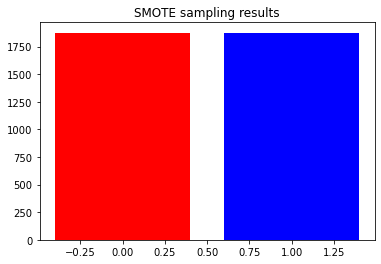

In [92]:
#oversample = RandomOverSampler(sampling_strategy='minority')
#oversample = RandomOverSampler(sampling_strategy=0.5)
oversample = SMOTE(random_state=42)
X_train, Y_train = oversample.fit_resample(x_train, y_train)
counter = Counter(Y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values(), color=['red', 'blue'])
plt.title("SMOTE sampling results")
plt.show()

Accuracy is:  0.9374337221633086


Text(0.5, 15.0, 'Predicted')

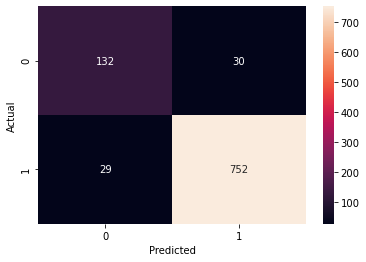

In [93]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf_OS = clf_rf.fit(X_train,Y_train)

# Results - ROC Curve
y_test_pred_probs_OS = clr_rf_OS.predict(x_test)
ac = accuracy_score(y_test, y_test_pred_probs_OS)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_test_pred_probs_OS)
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [94]:
print(classification_report(y_test, y_test_pred_probs_OS, digits=5))

print("roc_auc score: " + str(roc_auc_score(y_test, clr_rf_OS.predict_proba(x_test)[:,1])))
print("f1 score: " + str(f1_score(y_test, y_test_pred_probs_OS, average=None)))

              precision    recall  f1-score   support

           0    0.81988   0.81481   0.81734       162
           1    0.96164   0.96287   0.96225       781

    accuracy                        0.93743       943
   macro avg    0.89076   0.88884   0.88979       943
weighted avg    0.93728   0.93743   0.93736       943

roc_auc score: 0.9653103808033386
f1 score: [0.81733746 0.96225208]


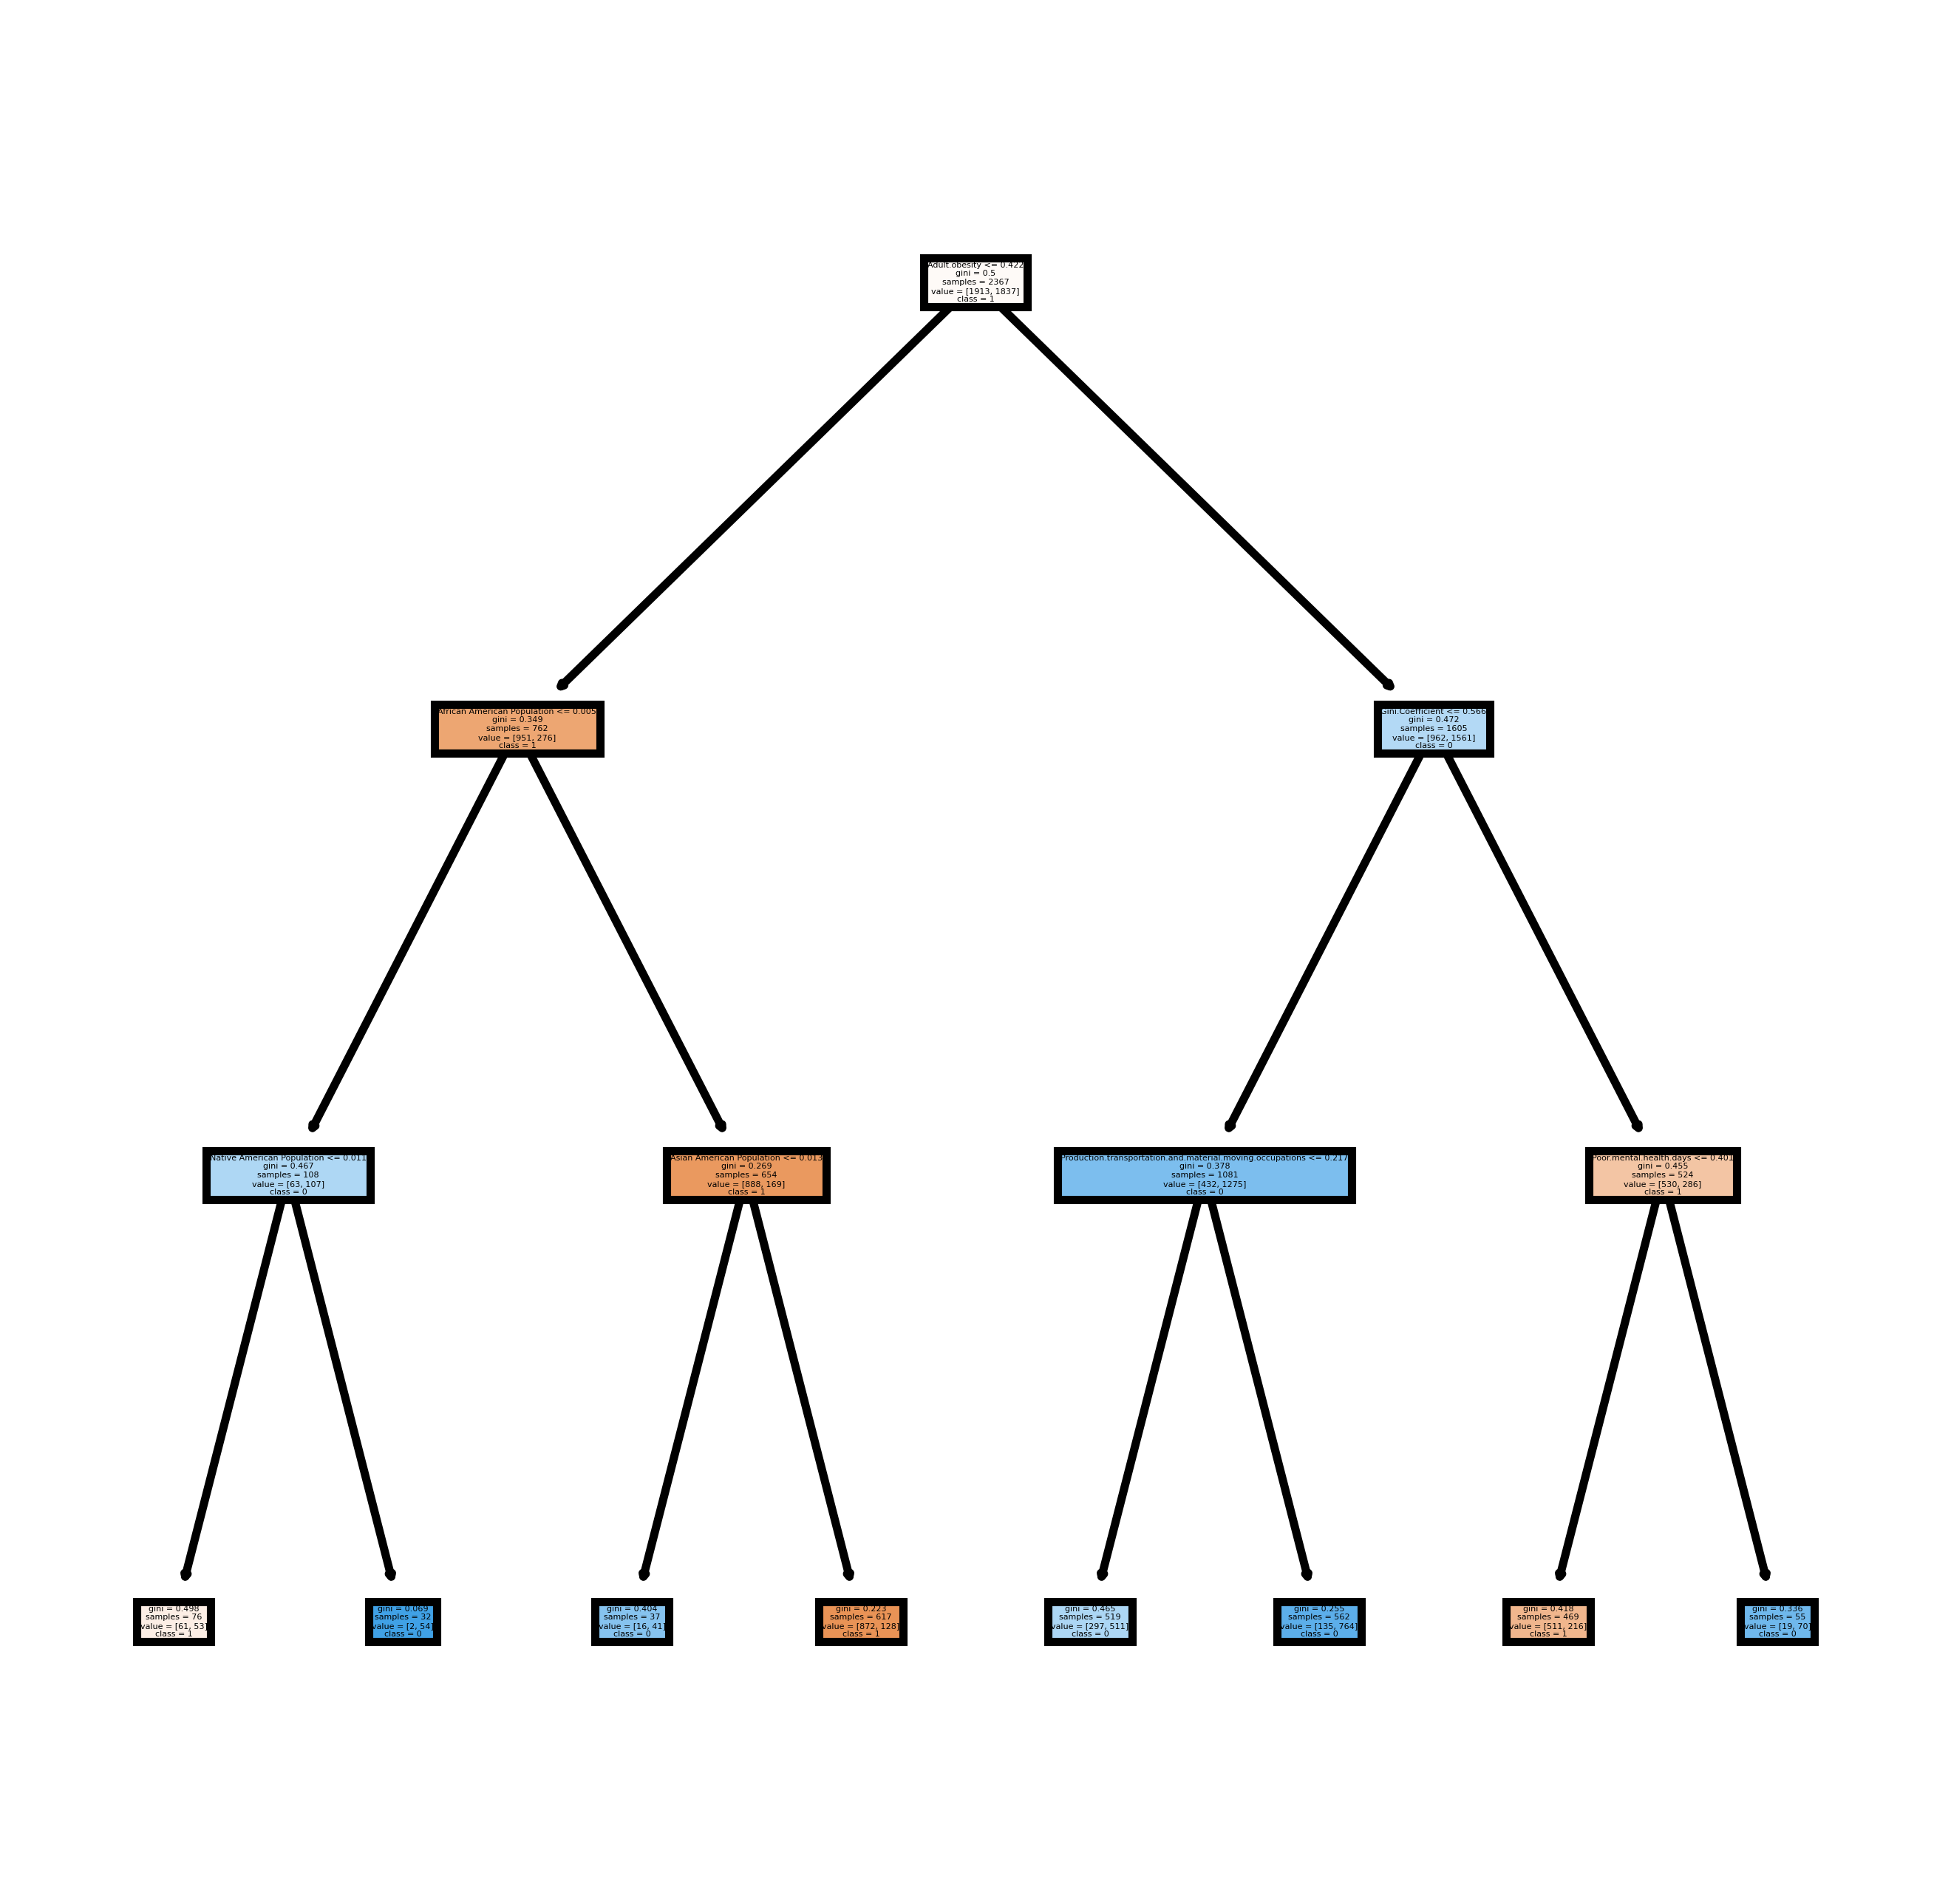

In [153]:
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf_OS = clf_rf.fit(X_train,Y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clr_rf_OS.estimators_[1],
               feature_names = x.columns, 
               class_names=['1', '0'],
               filled = True);
fig.savefig('rf_individualtree.png')

In [98]:
clr_rf_OS.feature_importances_.shape
for name, importance in zip(x.columns, clr_rf_OS.feature_importances_):
    print(name, "=", importance)

White (Not Latino) Population = 0.15021806105052374
African American Population = 0.07978402442797214
Native American Population = 0.015221219530242972
Asian American Population = 0.1265911831005966
Other Race or Races = 0.044584739316498166
Latino Population = 0.03589859075888321
Gini.Coefficient = 0.026179537426500026
Management.professional.and.related.occupations = 0.04364054967816294
Production.transportation.and.material.moving.occupations = 0.06745538024177186
Poor.physical.health.days = 0.015993976153159346
Poor.mental.health.days = 0.017641197618179724
Low.birthweight = 0.01814897530373746
Teen.births = 0.0294581399353569
Children.in.single.parent.households = 0.03968024707742541
Adult.smoking = 0.03193479311133277
Adult.obesity = 0.07160244966935403
Diabetes = 0.0754438135915148
Sexually.transmitted.infections = 0.05148007072497041
Uninsured = 0.023338415821515218
Violent.crime = 0.03570463546230223


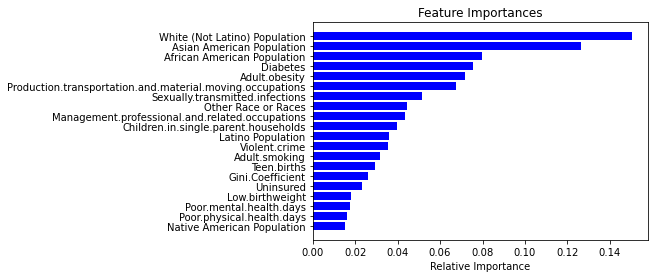

In [135]:
features = x.columns
importances = clr_rf_OS.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [147]:
from sklearn import metrics, datasets, ensemble

def print_decision_rules(rf):

    for tree_idx, est in enumerate(rf.estimators_):
        tree = est.tree_
        assert tree.value.shape[1] == 1 # no support for multi-output

        print('TREE: {}'.format(tree_idx))

        iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
        for node_idx, data in iterator:
            left, right, feature, th, value = data

            # left: index of left child (if any)
            # right: index of right child (if any)
            # feature: index of the feature to check
            # th: the threshold to compare against
            # value: values associated with classes            

            # for classifier, value is 0 except the index of the class to return
            class_idx = np.argmax(value[0])

            if left == -1 and right == -1:
                print('{} LEAF: return class={}'.format(node_idx, class_idx))
            else:
                print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))    

estimator = ensemble.RandomForestClassifier(random_state=43, n_estimators=3, max_depth=2)
estimator.fit(x_train, y_train)

print_decision_rules(estimator)

TREE: 0
0 NODE: if feature[1] < 0.5185830295085907 then next=1 else next=4
1 NODE: if feature[15] < 0.3520114868879318 then next=2 else next=3
2 LEAF: return class=1
3 LEAF: return class=1
4 NODE: if feature[1] < 0.5754936039447784 then next=5 else next=6
5 LEAF: return class=0
6 LEAF: return class=0
TREE: 1
0 NODE: if feature[19] < 0.22315459698438644 then next=1 else next=4
1 NODE: if feature[1] < 0.542102187871933 then next=2 else next=3
2 LEAF: return class=1
3 LEAF: return class=0
4 NODE: if feature[9] < 0.2977527976036072 then next=5 else next=6
5 LEAF: return class=0
6 LEAF: return class=1
TREE: 2
0 NODE: if feature[6] < 0.5696347057819366 then next=1 else next=4
1 NODE: if feature[13] < 0.7210927605628967 then next=2 else next=3
2 LEAF: return class=1
3 LEAF: return class=0
4 NODE: if feature[3] < 0.025761124677956104 then next=5 else next=6
5 LEAF: return class=1
6 LEAF: return class=0


In [170]:
estimator = RandomForestClassifier(random_state=43, max_depth=10, max_features=3, min_samples_leaf=1, min_samples_split=3,
                                   n_estimators=200).fit(x_train, y_train)

In [171]:
estimatorAccuracy=[]
for curEstimator in range(3):
    estimatorAccuracy.append([curEstimator,accuracy_score(y, estimator.estimators_[curEstimator].predict(x))])

estimatorAccuracy=pd.DataFrame(estimatorAccuracy,columns=['estimatorNumber','Accuracy'])
estimatorAccuracy.sort_values(inplace=True,by='Accuracy',ascending=False)

bestDecisionTree= estimator.estimators_[estimatorAccuracy.head(1)['estimatorNumber'].values[0]]

In [172]:
print(bestDecisionTree)

DecisionTreeClassifier(max_depth=10, max_features=3, min_samples_split=3,
                       random_state=494155588)


[Text(212.6570687269373, 207.55636363636364, 'X[1] <= 0.519\ngini = 0.251\nsamples = 2199\nvalue = [324, 1875]'),
 Text(105.95694188191884, 187.7890909090909, 'X[0] <= 0.516\ngini = 0.209\nsamples = 2113\nvalue = [250, 1863]'),
 Text(26.71605166051661, 168.0218181818182, 'X[18] <= 0.411\ngini = 0.5\nsamples = 165\nvalue = [82, 83]'),
 Text(9.88339483394834, 148.25454545454545, 'X[2] <= 0.017\ngini = 0.214\nsamples = 41\nvalue = [36, 5]'),
 Text(4.94169741697417, 128.48727272727274, 'X[16] <= 0.696\ngini = 0.059\nsamples = 33\nvalue = [32, 1]'),
 Text(2.470848708487085, 108.72, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(7.4125461254612555, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(14.825092250922511, 128.48727272727274, 'X[4] <= 0.04\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(12.354243542435427, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(17.295940959409595, 108.72, 'X[13] <= 0.776\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(14.825092

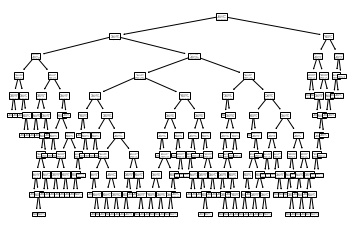

In [173]:
printTree = bestDecisionTree.fit(x_train, y_train)
tree.plot_tree(printTree)

## Randomized Search Cross Validation demog only

In [11]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [13]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [14]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

Accuracy is:  0.9374337221633086


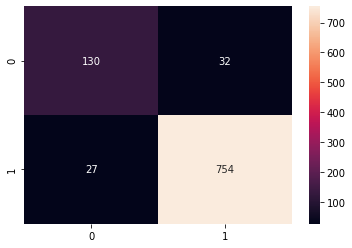

In [15]:
best_random = rf_random.best_estimator_

random_accuracy = accuracy_score(y_test, best_random.predict(x_test))
print('Accuracy is: ', random_accuracy)
cm = confusion_matrix(y_test, best_random.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d")

## Grid Search with Cross Validation demog only

In [83]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [30, 50, 100],
    'max_features': [3, 5], #['auto', 'sqrt']
    'min_samples_leaf': [1, 3],
    'min_samples_split': [3, 5, 10],
    'n_estimators': [200, 400, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='balanced_accuracy')

In [84]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  7.0min finished


{'max_depth': 50,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

Accuracy is:  0.9416755037115588


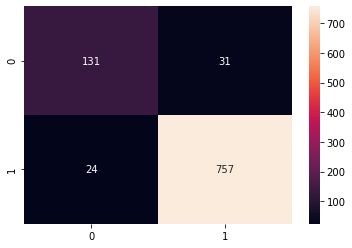

In [85]:
best_grid = grid_search.best_estimator_

grid_accuracy = accuracy_score(y_test, best_grid.predict(x_test))
print('Accuracy is: ', grid_accuracy)
cm = confusion_matrix(y_test, best_grid.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d")

In [86]:
y_test_pred_probs = best_grid.predict(x_test)
print(classification_report(y_test, y_test_pred_probs, digits=5))

print("roc_auc score: " + str(roc_auc_score(y_test, best_grid.predict_proba(x_test)[:,1])))
print("f1 score: " + str(f1_score(y_test, y_test_pred_probs, average=None)))

              precision    recall  f1-score   support

           0    0.84516   0.80864   0.82650       162
           1    0.96066   0.96927   0.96495       781

    accuracy                        0.94168       943
   macro avg    0.90291   0.88896   0.89572       943
weighted avg    0.94082   0.94168   0.94116       943

roc_auc score: 0.9632870172776276
f1 score: [0.82649842 0.96494583]


In [20]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [100, 120],
    'max_features': ['sqrt'], #['auto', 'sqrt']
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 5],
    'n_estimators': [1200, 1400, 1600]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='balanced_accuracy')

In [21]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

Accuracy is:  0.9374337221633086


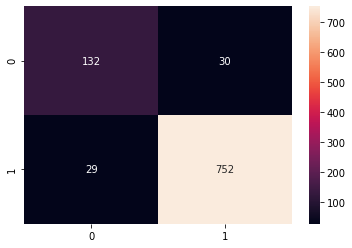

In [22]:
best_grid = grid_search.best_estimator_

grid_accuracy = accuracy_score(y_test, best_grid.predict(x_test))
print('Accuracy is: ', grid_accuracy)
cm = confusion_matrix(y_test, best_grid.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d")

In [23]:
y_test_pred_probs = best_grid.predict(x_test)
print(classification_report(y_test, y_test_pred_probs, digits=5))

print("roc_auc score: " + str(roc_auc_score(y_test, best_grid.predict_proba(x_test)[:,1])))
print("f1 score: " + str(f1_score(y_test, y_test_pred_probs, average=None)))

              precision    recall  f1-score   support

           0    0.81988   0.81481   0.81734       162
           1    0.96164   0.96287   0.96225       781

    accuracy                        0.93743       943
   macro avg    0.89076   0.88884   0.88979       943
weighted avg    0.93728   0.93743   0.93736       943

roc_auc score: 0.962603341711323
f1 score: [0.81733746 0.96225208]


## Baseline Model with Sentiment

In [174]:
# y includes our labels and x includes our features
y = df.CountyOutcome                          
x = df.drop(['CountyOutcome','Unnamed: 0'], axis=1)
x.head()

,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Gini.Coefficient,Management.professional.and.related.occupations,Production.transportation.and.material.moving.occupations,Poor.physical.health.days,...,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Violent.crime,tSentiment,cSentiment
0,0.831954,0.004646,0.083650,0.005855,0.108392,0.026248,0.463470,0.552174,0.114286,0.224719,...,0.319198,0.249047,0.229167,0.474138,0.310559,0.058300,0.585082,0.271977,-0.059051,-0.07589
1,0.398656,0.001742,0.425312,0.067916,0.256119,0.022131,0.388128,0.473913,0.106960,0.306081,...,0.319198,0.426938,0.378701,0.531609,0.329193,0.116776,0.645688,0.129210,-0.059051,-0.07589
2,0.095657,0.095819,0.243889,0.970726,0.090909,0.112198,0.438356,0.000000,1.000000,0.202247,...,0.463975,0.500635,0.731250,0.551724,0.273292,0.090651,1.000000,0.129210,-0.059051,-0.07589
3,0.634436,0.009292,0.210212,0.083138,0.131119,0.050437,0.408676,0.498261,0.099634,0.224719,...,0.182898,0.402795,0.379167,0.433908,0.260870,0.130144,0.517483,0.125592,-0.059051,-0.07589
4,0.701655,0.002323,0.158066,0.069087,0.177448,0.018013,0.349315,0.490435,0.171429,0.306081,...,0.319198,0.401399,0.378701,0.501554,0.460293,0.116776,0.347015,0.129210,-0.059051,-0.07589


In [175]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Class=0, n=1875 (59.675%)
Class=1, n=1875 (59.675%)


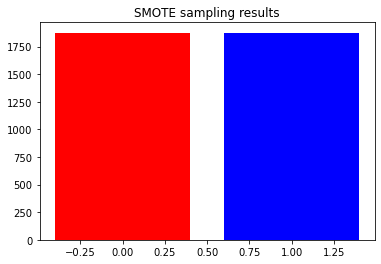

In [176]:
#oversample = RandomOverSampler(sampling_strategy='minority')
#oversample = RandomOverSampler(sampling_strategy=0.5)
oversample = SMOTE(random_state=42)
X_train, Y_train = oversample.fit_resample(x_train, y_train)
counter = Counter(Y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values(), color=['red', 'blue'])
plt.title("SMOTE sampling results")
plt.show()

Accuracy is:  0.9406150583244963


Text(0.5, 15.0, 'Predicted')

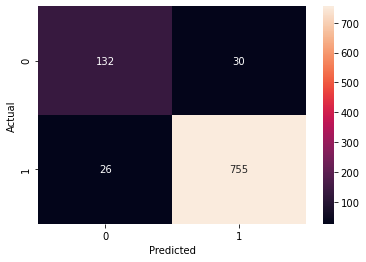

In [177]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf_OS = clf_rf.fit(X_train,Y_train)

# Results - ROC Curve
y_test_pred_probs_OS = clr_rf_OS.predict(x_test)
ac = accuracy_score(y_test, y_test_pred_probs_OS)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_test_pred_probs_OS)
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')

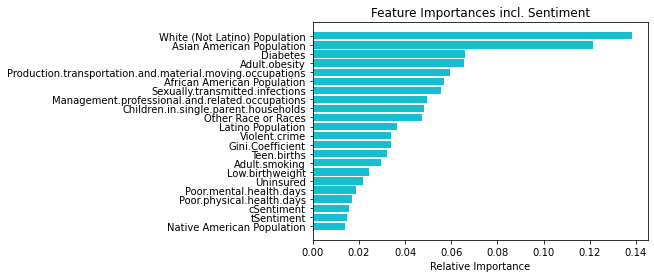

In [181]:
features = x.columns
importances = clr_rf_OS.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances incl. Sentiment')
plt.barh(range(len(indices)), importances[indices], color='tab:cyan', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [28]:
print(classification_report(y_test, y_test_pred_probs_OS, digits=5))

print("roc_auc score: " + str(roc_auc_score(y_test, clr_rf_OS.predict_proba(x_test)[:,1])))
print("f1 score: " + str(f1_score(y_test, y_test_pred_probs_OS, average=None)))

              precision    recall  f1-score   support

           0    0.83544   0.81481   0.82500       162
           1    0.96178   0.96671   0.96424       781

    accuracy                        0.94062       943
   macro avg    0.89861   0.89076   0.89462       943
weighted avg    0.94008   0.94062   0.94032       943

roc_auc score: 0.9610383964844059
f1 score: [0.825     0.9642401]


## Randomized Search Cross Validation with sentiment

In [30]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

Accuracy is:  0.9406150583244963


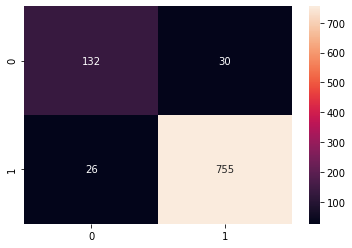

In [33]:
best_random = rf_random.best_estimator_

random_accuracy = accuracy_score(y_test, best_random.predict(x_test))
print('Accuracy is: ', random_accuracy)
cm = confusion_matrix(y_test, best_random.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d")

## Grid Search with Cross Validation with sentiment

In [38]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [30, 40, 50],
    'max_features': ['auto'], #['auto', 'sqrt']
    'min_samples_leaf': [1, 3],
    'min_samples_split': [3, 5, 10],
    'n_estimators': [100, 200, 400]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='balanced_accuracy')

In [39]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  1.5min finished


{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 400}

Accuracy is:  0.9416755037115588


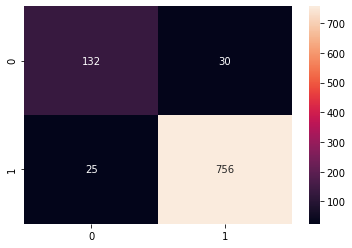

In [40]:
best_grid = grid_search.best_estimator_

grid_accuracy = accuracy_score(y_test, best_grid.predict(x_test))
print('Accuracy is: ', grid_accuracy)
cm = confusion_matrix(y_test, best_grid.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d")

In [41]:
from sklearn.metrics import classification_report
y_test_pred_probs = best_grid.predict(x_test)
print(classification_report(y_test, y_test_pred_probs, digits=5))

print("roc_auc score: " + str(roc_auc_score(y_test, best_grid.predict_proba(x_test)[:,1])))
print("f1 score: " + str(f1_score(y_test, y_test_pred_probs, average=None)))

              precision    recall  f1-score   support

           0    0.84076   0.81481   0.82759       162
           1    0.96183   0.96799   0.96490       781

    accuracy                        0.94168       943
   macro avg    0.90130   0.89140   0.89624       943
weighted avg    0.94103   0.94168   0.94131       943

roc_auc score: 0.9623978438532429
f1 score: [0.82758621 0.96490108]


## With RFE

In [42]:
import pandas as pd

df = pd.read_csv('dataFullClean.csv',sep=',')
df.head()

,Unnamed: 0,CountyOutcome,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,...,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths,tSentiment,cSentiment
0,0,1,0.103113,0.923631,0.436850,0.288177,0.8590,0.387625,0.831954,0.004646,...,0.229167,0.474138,0.310559,0.058300,0.585082,0.265455,0.271977,0.177474,-0.059051,-0.07589
1,1,1,0.171206,0.873199,0.210996,0.113300,0.8555,0.601213,0.398656,0.001742,...,0.378701,0.531609,0.329193,0.116776,0.645688,0.309091,0.129210,0.177474,-0.059051,-0.07589
2,2,1,0.684825,0.492795,0.087667,0.012315,0.5150,0.366759,0.095657,0.095819,...,0.731250,0.551724,0.273292,0.090651,1.000000,0.429091,0.129210,0.177474,-0.059051,-0.07589
3,3,1,0.136187,0.899135,0.378900,0.270936,0.7160,0.582521,0.634436,0.009292,...,0.379167,0.433908,0.260870,0.130144,0.517483,0.174545,0.125592,0.284610,-0.059051,-0.07589
4,4,1,0.073930,0.945245,0.352155,0.258621,0.8050,0.575652,0.701655,0.002323,...,0.378701,0.501554,0.460293,0.116776,0.347015,0.251052,0.129210,0.177474,-0.059051,-0.07589


## Baseline Model only demog only RFE

In [43]:
# y includes our labels and x includes our features
y = df.CountyOutcome                          
x_RFE = df[["At Least Bachelors's Degree",'White (Not Latino) Population','African American Population','Asian American Population','Total Population','Production.transportation.and.material.moving.occupations','Children.in.single.parent.households','Adult.obesity','Diabetes','Sexually.transmitted.infections']]
x_RFE.head()

,At Least Bachelors's Degree,White (Not Latino) Population,African American Population,Asian American Population,Total Population,Production.transportation.and.material.moving.occupations,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections
0,0.436850,0.831954,0.004646,0.005855,0.000243,0.114286,0.249047,0.474138,0.310559,0.058300
1,0.210996,0.398656,0.001742,0.067916,0.000047,0.106960,0.426938,0.531609,0.329193,0.116776
2,0.087667,0.095657,0.095819,0.970726,0.000303,1.000000,0.500635,0.551724,0.273292,0.090651
3,0.378900,0.634436,0.009292,0.083138,0.000894,0.099634,0.402795,0.433908,0.260870,0.130144
4,0.352155,0.701655,0.002323,0.069087,0.000383,0.171429,0.401399,0.501554,0.460293,0.116776


In [44]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_RFE, y, test_size=0.3, random_state=42)

Class=0, n=1875 (59.675%)
Class=1, n=1875 (59.675%)


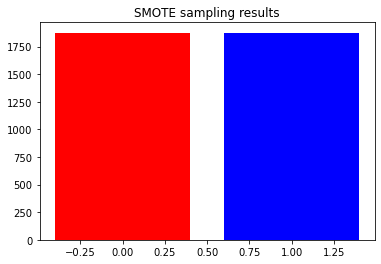

In [45]:
#oversample = RandomOverSampler(sampling_strategy='minority')
#oversample = RandomOverSampler(sampling_strategy=0.5)
oversample = SMOTE(random_state=42)
X_train, Y_train = oversample.fit_resample(x_train, y_train)
counter = Counter(Y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values(), color=['red', 'blue'])
plt.title("SMOTE sampling results")
plt.show()

Accuracy is:  0.9289501590668081


Text(0.5, 15.0, 'Predicted')

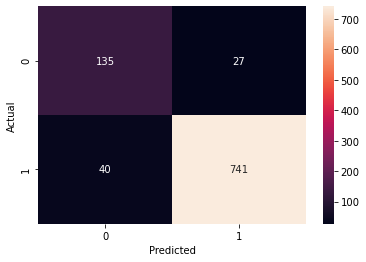

In [46]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf_OS = clf_rf.fit(X_train,Y_train)

# Results - ROC Curve
y_test_pred_probs_OS = clr_rf_OS.predict(x_test)
ac = accuracy_score(y_test, y_test_pred_probs_OS)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_test_pred_probs_OS)
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [47]:
print(classification_report(y_test, y_test_pred_probs_OS, digits=5))

print("roc_auc score: " + str(roc_auc_score(y_test, clr_rf_OS.predict_proba(x_test)[:,1])))
print("f1 score: " + str(f1_score(y_test, y_test_pred_probs_OS, average=None)))

              precision    recall  f1-score   support

           0    0.77143   0.83333   0.80119       162
           1    0.96484   0.94878   0.95675       781

    accuracy                        0.92895       943
   macro avg    0.86814   0.89106   0.87897       943
weighted avg    0.93162   0.92895   0.93002       943

roc_auc score: 0.9670926795339941
f1 score: [0.80118694 0.95674629]


## Randomized Search Cross Validation demog only RFE

In [56]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1600, num = 8)]
# Number of features to consider at every split
max_features = [3, 5, 10] #['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [3, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [3, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]}


In [57]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring="balanced_accuracy")
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [3, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [3, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400,
                                                         1600]},
                   random_state=42, scoring='balanced_accuracy', verbose=2)

In [59]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 100}

Accuracy is:  0.9300106044538706


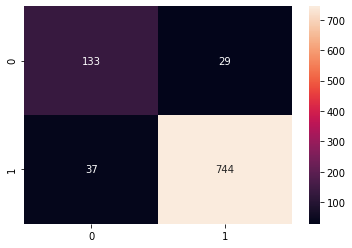

In [60]:
best_random = rf_random.best_estimator_

random_accuracy = accuracy_score(y_test, best_random.predict(x_test))
print('Accuracy is: ', random_accuracy)
cm = confusion_matrix(y_test, best_random.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d")

## Grid Search with Cross Validation demog only RFE

In [61]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [100, 110, 120],
    'max_features': [3, 5], #['auto', 'sqrt']
    'min_samples_leaf': [1, 3],
    'min_samples_split': [3, 5, 10],
    'n_estimators': [200, 600, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring="balanced_accuracy")

In [62]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 10.0min finished


{'max_depth': 120,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 1000}

Accuracy is:  0.9310710498409331


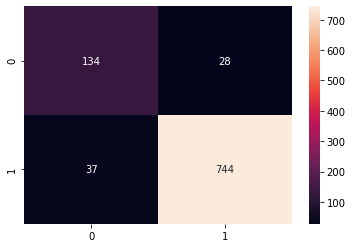

In [63]:
best_grid = grid_search.best_estimator_

grid_accuracy = accuracy_score(y_test, best_grid.predict(x_test))
print('Accuracy is: ', grid_accuracy)
cm = confusion_matrix(y_test, best_grid.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d")

In [64]:
from sklearn.metrics import classification_report
y_test_pred_probs = best_grid.predict(x_test)
print(classification_report(y_test, y_test_pred_probs, digits=5))

print("roc_auc score: " + str(roc_auc_score(y_test, best_grid.predict_proba(x_test)[:,1])))
print("f1 score: " + str(f1_score(y_test, y_test_pred_probs, average=None)))

              precision    recall  f1-score   support

           0    0.78363   0.82716   0.80480       162
           1    0.96373   0.95262   0.95815       781

    accuracy                        0.93107       943
   macro avg    0.87368   0.88989   0.88148       943
weighted avg    0.93279   0.93107   0.93180       943

roc_auc score: 0.9667488658098987
f1 score: [0.8048048  0.95814552]


## With Sentiment and RFE

## Baseline Model with Sentiment RFE

In [65]:
# y includes our labels and x includes our features
y = df.CountyOutcome                          
x_RFE = df[["At Least Bachelors's Degree",'White (Not Latino) Population','African American Population','Asian American Population','Total Population','Production.transportation.and.material.moving.occupations','Children.in.single.parent.households','Adult.obesity','Diabetes','Sexually.transmitted.infections','tSentiment','cSentiment']]
x_RFE.head()

,At Least Bachelors's Degree,White (Not Latino) Population,African American Population,Asian American Population,Total Population,Production.transportation.and.material.moving.occupations,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,tSentiment,cSentiment
0,0.436850,0.831954,0.004646,0.005855,0.000243,0.114286,0.249047,0.474138,0.310559,0.058300,-0.059051,-0.07589
1,0.210996,0.398656,0.001742,0.067916,0.000047,0.106960,0.426938,0.531609,0.329193,0.116776,-0.059051,-0.07589
2,0.087667,0.095657,0.095819,0.970726,0.000303,1.000000,0.500635,0.551724,0.273292,0.090651,-0.059051,-0.07589
3,0.378900,0.634436,0.009292,0.083138,0.000894,0.099634,0.402795,0.433908,0.260870,0.130144,-0.059051,-0.07589
4,0.352155,0.701655,0.002323,0.069087,0.000383,0.171429,0.401399,0.501554,0.460293,0.116776,-0.059051,-0.07589


In [66]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_RFE, y, test_size=0.3, random_state=42)

Class=0, n=1875 (59.675%)
Class=1, n=1875 (59.675%)


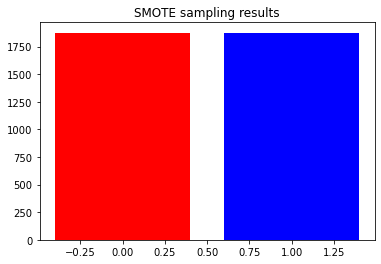

In [67]:
#oversample = RandomOverSampler(sampling_strategy='minority')
#oversample = RandomOverSampler(sampling_strategy=0.5)
oversample = SMOTE(random_state=42)
X_train, Y_train = oversample.fit_resample(x_train, y_train)
counter = Counter(Y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values(), color=['red', 'blue'])
plt.title("SMOTE sampling results")
plt.show()

Accuracy is:  0.9278897136797455


Text(0.5, 15.0, 'Predicted')

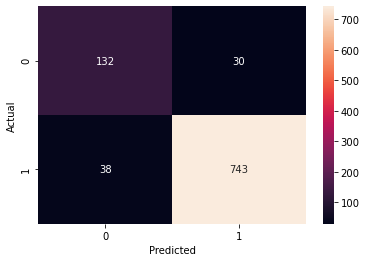

In [68]:
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf_OS = clf_rf.fit(X_train,Y_train)

# Results - ROC Curve
y_test_pred_probs_OS = clr_rf_OS.predict(x_test)
ac = accuracy_score(y_test, y_test_pred_probs_OS)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_test_pred_probs_OS)
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')

## Randomized Search Cross Validation with sentiment RFE

In [69]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1600, num = 8)]
# Number of features to consider at every split
max_features = [3, 5, 10] #['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [3, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [3, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]}


In [70]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring="balanced_accuracy")
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [3, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [3, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400,
                                                         1600]},
                   random_state=42, scoring='balanced_accuracy', verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 30}

Accuracy is:  0.9236479321314952


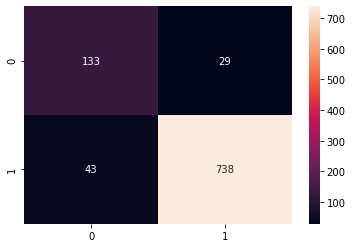

In [72]:
best_random = rf_random.best_estimator_

random_accuracy = accuracy_score(y_test, best_random.predict(x_test))
print('Accuracy is: ', random_accuracy)
cm = confusion_matrix(y_test, best_random.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d")

## Grid Search with Cross Validation with sentiment RFE

In [73]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [30, 50, 100],
    'max_features': [3, 5], #['auto', 'sqrt']
    'min_samples_leaf': [1, 3],
    'min_samples_split': [3, 5, 10],
    'n_estimators': [200, 400, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring="balanced_accuracy")

In [74]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  6.7min finished


{'max_depth': 30,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 400}

Accuracy is:  0.9342523860021209


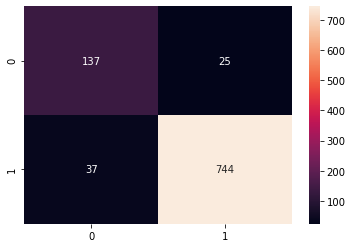

In [75]:
best_grid = grid_search.best_estimator_

grid_accuracy = accuracy_score(y_test, best_grid.predict(x_test))
print('Accuracy is: ', grid_accuracy)
cm = confusion_matrix(y_test, best_grid.predict(x_test))
sns.heatmap(cm, annot=True, fmt="d")

In [76]:
from sklearn.metrics import classification_report
y_test_pred_probs = best_grid.predict(x_test)
print(classification_report(y_test, y_test_pred_probs, digits=5))

print("roc_auc score: " + str(roc_auc_score(y_test, best_grid.predict_proba(x_test)[:,1])))
print("f1 score: " + str(f1_score(y_test, y_test_pred_probs, average=None)))

              precision    recall  f1-score   support

           0    0.78736   0.84568   0.81548       162
           1    0.96749   0.95262   0.96000       781

    accuracy                        0.93425       943
   macro avg    0.87742   0.89915   0.88774       943
weighted avg    0.93654   0.93425   0.93517       943

roc_auc score: 0.9683770411469941
f1 score: [0.81547619 0.96      ]
